# 0. Wczytanie bibliotek + testowe wczytanie obrazku

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,Adam

In [77]:
img = image.load_img("basedata/1_train/OtherTree/screen_1280x720 (100).jpg")

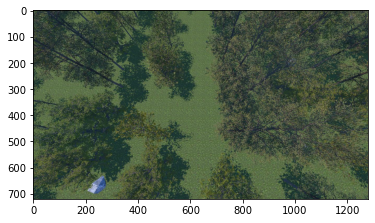

In [78]:
plt.imshow(img)

# 1. Podzielenie na zbiór testowy i walidacyjny

In [79]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [91]:
train_dataset = train.flow_from_directory('basedata/1_train', target_size = (408,240), batch_size = 10, class_mode = 'binary')
validation_dataset = train.flow_from_directory('basedata/2_valid', target_size = (408,240), batch_size = 10, class_mode = 'binary')

Found 751 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [92]:
train_dataset.class_indices

{'OtherTree': 0, 'Tree1': 1}

# 2. Stworzenie modelu CNN

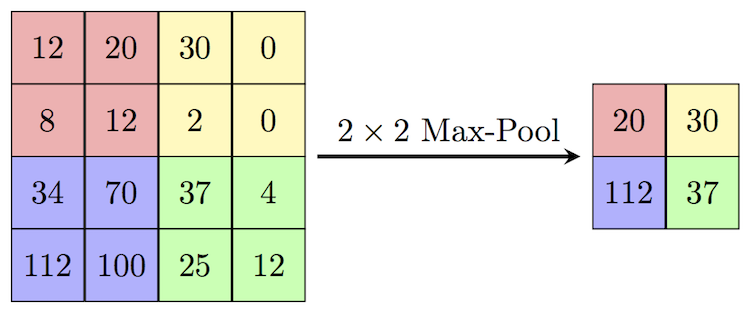

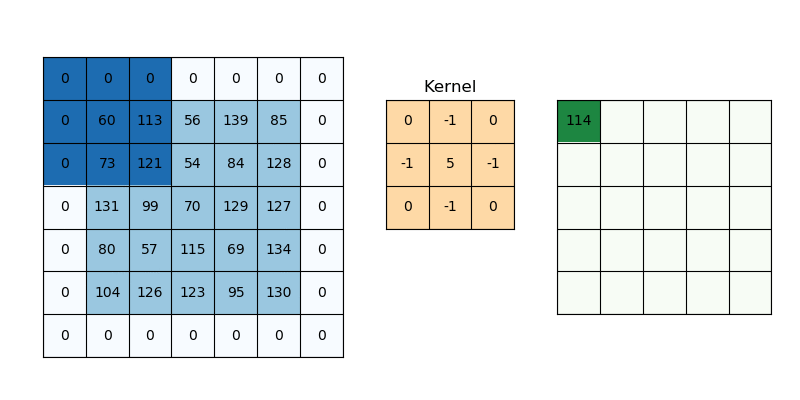!

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(408,240,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(512, activation = 'relu'),
    #
    tf.keras.layers.Dense(1,activation = 'sigmoid')
    
])

In [96]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [97]:
model_fit = model.fit(train_dataset, steps_per_epoch =60, epochs=10, validation_data = validation_dataset)

Epoch 1/10
60/60 [==============================] - 28s 452ms/step - loss: 0.0939 - accuracy: 0.9662 - val_loss: 1.0233 - val_accuracy: 0.7826
Epoch 2/10
60/60 [==============================] - 28s 459ms/step - loss: 0.0832 - accuracy: 0.9650 - val_loss: 1.1576 - val_accuracy: 0.7717
Epoch 3/10
60/60 [==============================] - 27s 456ms/step - loss: 0.0974 - accuracy: 0.9712 - val_loss: 1.3761 - val_accuracy: 0.7283
Epoch 4/10
60/60 [==============================] - 27s 444ms/step - loss: 0.0197 - accuracy: 0.9967 - val_loss: 0.8148 - val_accuracy: 0.8152
Epoch 5/10
60/60 [==============================] - 27s 442ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.8587
Epoch 6/10
60/60 [==============================] - 27s 455ms/step - loss: 2.3164e-04 - accuracy: 1.0000 - val_loss: 0.7895 - val_accuracy: 0.8478
Epoch 7/10
60/60 [==============================] - 27s 452ms/step - loss: 1.2268e-04 - accuracy: 1.0000 - val_loss: 0.7648 - val_accuracy

In [99]:
path_to_model_cnn = 'models/cnn_D'
model.save(path_to_model_cnn)

INFO:tensorflow:Assets written to: models/cnn_D\assets
